# Web data access

Just topics in this notebook, using the  `http` requests protocol:

1. Using Web APIs to access data in json format (this material required for Exercises 2 and 3)

Another notebook will be distributed with the following (also using http requests):

1. Reading website pages to access data in html format 
1. Controlling website pages to access data in html format 


## http requests

Types of http requests:
~~~
get  : used to request data from a resource.
post : used to send data to a server.
put  : same as a post request, except they are idempotent (multiple put requests are treated the same as a single put request).
delete : deletes an entity from a resource
head: gets the header information from a resource
~~~
Types of http codes:
~~~
200  : everything went okay
300s : redirection
400s : error
~~~

- A request is made to a webpage -- and for APIs, this is known as an endpoint.

- (not to be confused with endpoint security -- a different use of the word.)

- in general to API will have multiple endpoints to access one or more data resources

- the get request can take parameters in the following form:
~~~
https://www.myapiserver.com/myendpoint?key1=value1&key2=value2 etc
~~~

## Python http requests module:

https://requests.readthedocs.io/en/master/

most important thing to remember: 
- `get` *vs* `post`: with `get`, the accompanything dict is called `params`, with `post`, it is called `json` or `data`   


## RESTful api 
### references:
- https://searchapparchitecture.techtarget.com/definition/RESTful-API (as long as the ads don't crowd you out)
- https://en.wikipedia.org/wiki/Representational_state_transfer

### RESTful api examples:
- https://api.tfl.gov.uk/
- https://rapidapi.com/Streamzui/api/streamzui-amazon-prime-video-search
- https://trailhead.salesforce.com/en/content/learn/modules/api_basics/api_basics_rest
- https://developer.ebay.com/api-docs/static/ebay-rest-landing.html

### two RESTful api examples we'll be using:
- http://api.open-notify.org
- https://docs.openaq.org/


### Example: get ISS Current position



In [11]:
import json
import datetime as dt
import requests # pypi.org/project/requests

url = r'http://api.open-notify.org/iss-now.json'

http_response = requests.get(url)



In [12]:
#dir(http_response)
print('status code is', http_response.status_code)
print('text is', http_response.text)
type(http_response.text)

unpacked_response = json.loads(http_response.text)


status code is 200
text is {"timestamp": 1600260624, "iss_position": {"latitude": "-51.5409", "longitude": "-17.8067"}, "message": "success"}


In [17]:
type(unpacked_response)
unpacked_response.keys()
lat = float(unpacked_response['iss_position']['latitude'])
lat

-51.5409

## Example next time ISS passes a chosen location 

Requires 'lat=' and 'lon' parameters, we can specify these either:
- directly in the url 
- using the requests library to compose the request for us

 

In [33]:
url = r'http://api.open-notify.org/iss-pass.json'

london_lat = 51.5074
london_lon = 0.1278

url_with_params = url + "?" + "lat=" + str(london_lat) + "&" + 'lon=' + str(london_lon)

my_params = {'lat':london_lat, 'lon':london_lon, 'passes':9}

http_response = requests.get(url, params=my_params)
#http_response = requests.get(url_with_params)
print(url_with_params)


http_response.status_code

http://api.open-notify.org/iss-pass.json?lat=51.5074&lon=0.1278


200

In [34]:
r = json.loads(http_response.text)

In [35]:
r.

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1600261684,
  'latitude': 51.5074,
  'longitude': 0.1278,
  'passes': 5},
 'response': [{'duration': 545, 'risetime': 1600284923},
  {'duration': 646, 'risetime': 1600290645},
  {'duration': 657, 'risetime': 1600296443},
  {'duration': 654, 'risetime': 1600302253},
  {'duration': 604, 'risetime': 1600308064}]}

In [41]:
d = dt.datetime.fromtimestamp(r['response'][0]['risetime'])
d


datetime.datetime(2020, 9, 16, 20, 35, 23)

In [44]:
url = 'http://api.open-notify.org/astros.json'
r = requests.get(url)
print('status code is', r.status_code)
unpacked = json.loads(r.text)
for astro in unpacked['people']:
    astro_name = astro['name'].split(' ')
    print(astro_name[0])

status code is 200
Chris
Anatoly
Ivan


## The OpenAQ API

https://openaq.org/

https://docs.openaq.org/

There are different types of Air Quality measurement, e,g, no2, pm10, pm25 -- these are the measurement 'parameter'. These measurements are submitted at various times and locations from all over the world, and accessible via the following end-points:

https://api.openaq.org/v1/countries

https://api.openaq.org/v1/cities

https://api.openaq.org/v1/latest

https://api.openaq.org/v1/measurements



## Example: print a list of the latest Air Quality results for a given city 

In [59]:
url = 'https://api.openaq.org/v1/cities'
#params = {'country': 'United Kingdom'}
all_responses = []
page = 1
while True:
    params = {'country': 'GB',
              'page': page}
    r = requests.get(url, params)
    print('status code is', r.status_code)
    response = json.loads(r.text)
    if len(response['results'])==0:
        break
    all_responses.extend(response['results'])
    print('length of all responses is ', len(all_responses))
    page += 1
    

status code is 200
length of all responses is  100
status code is 200
length of all responses is  112
status code is 200


In [58]:
response


{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 11,
  'limit': 100,
  'found': 112},
 'results': []}

In [60]:
city_names = [city['name'] for city in all_responses]
city_names


['Aberdeen',
 'Armagh',
 'Aston Hill',
 'Auchencorth',
 'Ballymena',
 'Barnsley',
 'Barnstaple',
 'Bath',
 'Belfast',
 'Billingham',
 'Birmingham',
 'Blackburn',
 'Blackpool',
 'Bottesford',
 'Bournemouth',
 'Bradford',
 'Brighton',
 'Bristol',
 'Bury',
 'Bush Estate',
 'Cambridge',
 'Canterbury',
 'Cardiff',
 'Carlisle',
 'Central Scotland',
 'Charlton',
 'Chatham',
 'Chepstow',
 'Chesterfield',
 'Coventry',
 'Crompton Way   OL2 8AQ',
 'Derby',
 'Derry',
 'Doncaster',
 'Dumbarton',
 'Dumfries',
 'Eastbourne',
 'Edinburgh',
 'Eskdalemuir',
 'Exeter',
 'Fort William',
 'Glasgow',
 'Glazebury',
 'Grangemouth',
 'Great Dun Fell',
 'High Muffles',
 'Honiton',
 'Horley',
 'Hull',
 'Inverness',
 'Ladybower',
 'Leamington Spa',
 'Leeds',
 'Leicester',
 'Leominster',
 'Lerwick',
 'Lincoln',
 'Liverpool',
 'London',
 'Lough Navar',
 'Lullington Heath',
 'Luton',
 'Mace Head',
 'Manchester',
 'Market Harborough',
 'Middlesbrough',
 'Narberth',
 'Newcastle',
 'Newport',
 'Northampton',
 'North We

In [63]:
class OpenAQClient:
    def __init__(self, base_url):
        self.base_url = base_url
        
    def get_latest_results(self, city):
        url = self.base_url + 'latest'
        params = {'city':city,
                  'parameter':parameter}
        r = requests.get(url, params)
        response = json.loads(r.text)
        print('status code is', r.status_code)
        return response
    def get_readings(self, parameter):
        


base_url = 'https://api.openaq.org/v1/'
my_open_aq_client = OpenAQClient(base_url)
response = my_open_aq_client.get_latest_results('Leeds')

status code is 200


In [64]:
response

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 1,
  'limit': 100,
  'found': 2},
 'results': [{'location': 'Leeds Centre',
   'city': 'Leeds',
   'country': 'GB',
   'distance': 5964925.6026328355,
   'measurements': [{'parameter': 'o3',
     'value': 50,
     'lastUpdated': '2020-09-17T07:00:00.000Z',
     'unit': 'µg/m³',
     'sourceName': 'DEFRA',
     'averagingPeriod': {'value': 8, 'unit': 'hours'}},
    {'parameter': 'so2',
     'value': 2,
     'lastUpdated': '2020-09-17T07:00:00.000Z',
     'unit': 'µg/m³',
     'sourceName': 'DEFRA',
     'averagingPeriod': {'value': 0.25, 'unit': 'hours'}},
    {'parameter': 'pm25',
     'value': 7,
     'lastUpdated': '2020-09-17T07:00:00.000Z',
     'unit': 'µg/m³',
     'sourceName': 'DEFRA',
     'averagingPeriod': {'value': 24, 'unit': 'hours'}},
    {'parameter': 'pm10',
     'value': 15,
     'lastUpdated': '2020-09-17T07:00:00.000Z',
     'unit': 'µg/m³',
     'sourceName'

In [77]:
# Exercise: please extract a dictionary containing {location:reading} for the no2 measurements
#e.g.
#['city centre':23, 'headingly kerbside':35]
location_readings = {}

response['results'][0]['location'] # add as a key in our dictionary
response['results'][0]['measurements'][0]['parameter'] # filter the no2 measurements
response['results'][0]['measurements'][0]['value'] # add as the corresponding value in our dict 

for location in response['results']:
    location_name = location['location'] # this will be our key
    location_value = None
    for measurement in location['measurements']:
        if measurement['parameter']=='no2':
            location_value = measurement['value']
    location_readings[location_name] = location_value
    
location_readings
    

{'Leeds Centre': 33, 'Leeds Headingley Kerbside': 35}

In [5]:
# another example: use 'measurements' endpoint:

url = r"https://api.openaq.org/v1/measurements"




### concept check (exercise):

- choose a location, and a parameter (=measurement type), and use the 'measurements' endpoint to obtain historical data (i.e. between two dates, e.g. one year apart)



200


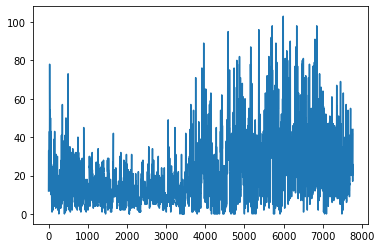

In [88]:
def get_historical_data():
    url = r'https://api.openaq.org/v1/measurements'
    
    params = {'parameter':'no2', 
              'location':'York Fishergate',
              'date_from':'2019-09-17T06:00:00Z',
              'date_to': '2020-09-17',
              'limit':9999}
    r = requests.get(url, params)
    print(r.status_code)
    response = json.loads(r.text)
    output = [item['value'] for item in response['results']]
    return output

output = get_historical_data()
import matplotlib.pyplot as plt
plt.plot(output)
    

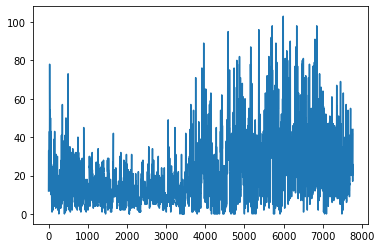

In [87]:
response['results'][0]
results = []
for item in response['results']:
    results.append(item['value'])
    
len(results)
import matplotlib.pyplot as plt

plt.plot(results)